<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,82.563407,-0.005867,92.557540,92.562231,-0.004692
1,0.0,1.0,66.633756,-0.001085,76.632671,76.633130,-0.000459
2,0.0,2.0,23.709226,-0.005827,33.703399,33.710078,-0.006679
3,0.0,3.0,59.276704,-0.009025,69.267679,69.276331,-0.008652
4,0.0,4.0,67.242454,0.005683,77.248137,77.241806,0.006331
...,...,...,...,...,...,...,...
59995,999.0,55.0,74.651898,-0.003368,84.648530,84.650654,-0.002124
59996,999.0,56.0,78.076437,-0.004277,88.072159,88.075123,-0.002964
59997,999.0,57.0,28.732907,0.021870,38.754778,38.732594,0.022184
59998,999.0,58.0,21.038159,-0.002298,31.035862,31.038002,-0.002140


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    82.563407 -0.005867  92.557540  92.562231 -0.004692
      1.0    66.633756 -0.001085  76.632671  76.633130 -0.000459
      2.0    23.709226 -0.005827  33.703399  33.710078 -0.006679
      3.0    59.276704 -0.009025  69.267679  69.276331 -0.008652
      4.0    67.242454  0.005683  77.248137  77.241806  0.006331
...                ...       ...        ...        ...       ...
999.0 55.0   74.651898 -0.003368  84.648530  84.650654 -0.002124
      56.0   78.076437 -0.004277  88.072159  88.075123 -0.002964
      57.0   28.732907  0.021870  38.754778  38.732594  0.022184
      58.0   21.038159 -0.002298  31.035862  31.038002 -0.002140
      59.0   68.184975  0.009783  78.194757  78.183862  0.010895

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    82.563407 -0.005867  92.557540  92.562231 -0.004692
      1.0    66.633756 -0.001085  76.632671  76.633130 -0.000459
      2.0    23.709226 -0.005827  33.703399  33.710078 -0.006679
      3.0    59.276704 -0.009025  69.267679  69.276331 -0.008652
      4.0    67.242454  0.005683  77.248137  77.241806  0.006331
...                ...       ...        ...        ...       ...
999.0 55.0   74.651898 -0.003368  84.648530  84.650654 -0.002124
      56.0   78.076437 -0.004277  88.072159  88.075123 -0.002964
      57.0   28.732907  0.021870  38.754778  38.732594  0.022184
      58.0   21.038159 -0.002298  31.035862  31.038002 -0.002140
      59.0   68.184975  0.009783  78.194757  78.183862  0.010895

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,82.563407,-0.005867,92.557540,92.562231,-0.004692
1,0.0,1.0,66.633756,-0.001085,76.632671,76.633130,-0.000459
2,0.0,2.0,23.709226,-0.005827,33.703399,33.710078,-0.006679
3,0.0,3.0,59.276704,-0.009025,69.267679,69.276331,-0.008652
4,0.0,4.0,67.242454,0.005683,77.248137,77.241806,0.006331
...,...,...,...,...,...,...,...
59995,999.0,55.0,74.651898,-0.003368,84.648530,84.650654,-0.002124
59996,999.0,56.0,78.076437,-0.004277,88.072159,88.075123,-0.002964
59997,999.0,57.0,28.732907,0.021870,38.754778,38.732594,0.022184
59998,999.0,58.0,21.038159,-0.002298,31.035862,31.038002,-0.002140


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    82.563407 -0.005867  92.557540  92.562231 -0.004692
      1.0    66.633756 -0.001085  76.632671  76.633130 -0.000459
      2.0    23.709226 -0.005827  33.703399  33.710078 -0.006679
      3.0    59.276704 -0.009025  69.267679  69.276331 -0.008652
      4.0    67.242454  0.005683  77.248137  77.241806  0.006331
...                ...       ...        ...        ...       ...
999.0 55.0   74.651898 -0.003368  84.648530  84.650654 -0.002124
      56.0   78.076437 -0.004277  88.072159  88.075123 -0.002964
      57.0   28.732907  0.021870  38.754778  38.732594  0.022184
      58.0   21.038159 -0.002298  31.035862  31.038002 -0.002140
      59.0   68.184975  0.009783  78.194757  78.183862  0.010895

[60000 rows x 5 columns]

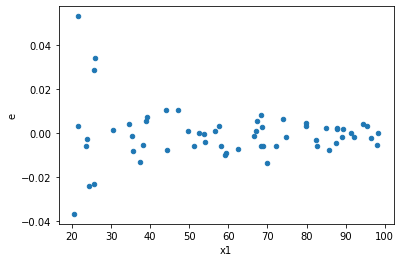

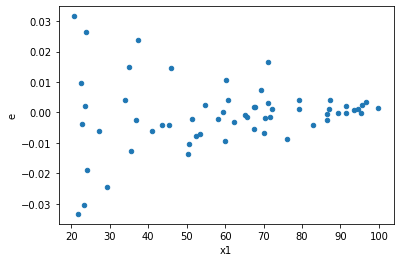

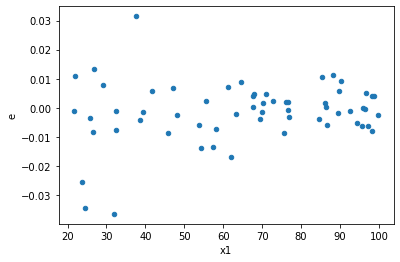

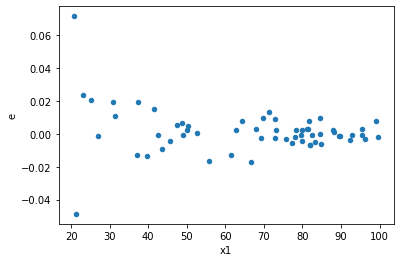

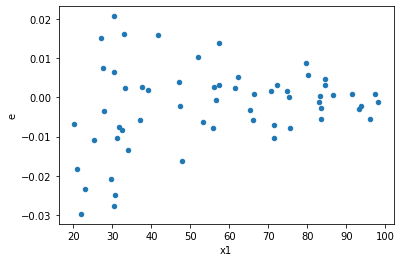

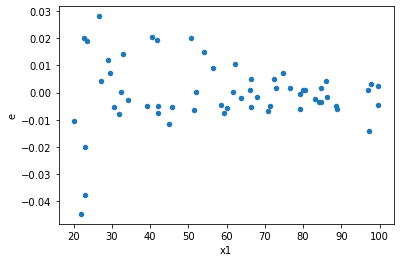

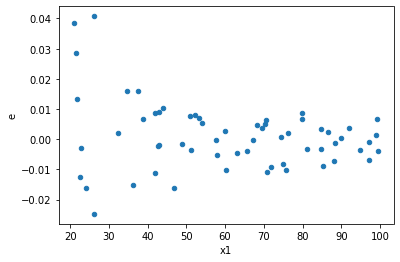

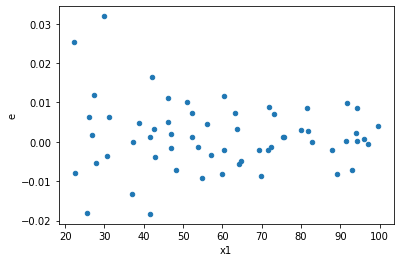

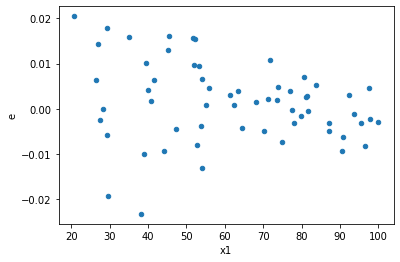

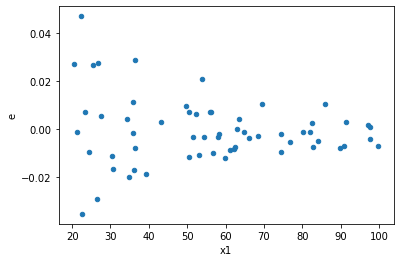

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,34.0,24.0,0.0008169659911431734,0.006359509964809305,2.4028411504210984e-05,0.00026497958186705436,11.027761107745997,5.494373644943096e-08,0.9999999725281318,2.747186822471548e-08,Reject001=0 : Heteroscedasticity
2.0,36.0,22.0,0.0012378704272257058,0.00488188316369573,3.4385289645158495e-05,0.00022190378016798771,6.453450951204424,2.1558534185395217e-05,0.9999892207329073,1.0779267092697609e-05,Reject001=0 : Heteroscedasticity
6.0,29.0,29.0,0.0009133626613792952,0.006282963654095974,3.1495264185492936e-05,0.00021665391910675774,6.878936395985239,1.4453788328427919e-06,0.9999992773105836,7.226894164213959e-07,Reject001=0 : Heteroscedasticity
9.0,30.0,28.0,0.0010675398857535757,0.00989026009531599,3.5584662858452525e-05,0.0003532235748327139,9.926286957888424,2.9954541291843384e-08,0.9999999850227294,1.4977270645921692e-08,Reject001=0 : Heteroscedasticity
10.0,31.0,27.0,0.0010098379123308489,0.003156638054361154,3.2575416526801574e-05,0.00011691252053189459,3.5889800652496424,0.0011705753917050643,0.9994147123041475,0.0005852876958525322,Reject001=0 : Heteroscedasticity
13.0,29.0,29.0,0.0006094047900275698,0.0076579280261766325,2.101395827681275e-05,0.0002640664836612632,12.566241932279832,1.143308114848196e-09,0.9999999994283459,5.71654057424098e-10,Reject001=0 : Heteroscedasticity
14.0,27.0,31.0,0.0007412105001773897,0.004993989900467557,2.745224074731073e-05,0.00016109644840217927,5.868244049184239,5.623998197368252e-06,0.9999971880009013,2.811999098684126e-06,Reject001=0 : Heteroscedasticity
15.0,28.0,30.0,0.0009947118038597116,0.006965459700887969,3.552542156641827e-05,0.00023218199002959897,6.535657559911341,2.0384381156368647e-06,0.9999989807809422,1.0192190578184324e-06,Reject001=0 : Heteroscedasticity
19.0,32.0,26.0,0.0005836678319324074,0.004400704848974946,1.823961974788773e-05,0.0001692578788067287,9.27968242464758,1.3986637492635623e-07,0.9999999300668125,6.993318746317811e-08,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,29.0,0.008188804203427776,0.0007047362727267598,0.0002823725587388888,2.430125078368137e-05,0.0860609504415507,3.027727136277536e-09,Reject001=0 : Heteroscedasticity
1.0,34.0,24.0,0.0008169659911431734,0.006359509964809305,2.4028411504210984e-05,0.00026497958186705436,11.027761107745997,5.494373644943096e-08,Reject001=0 : Heteroscedasticity
2.0,36.0,22.0,0.0012378704272257058,0.00488188316369573,3.4385289645158495e-05,0.00022190378016798771,6.453450951204424,2.1558534185395217e-05,Reject001=0 : Heteroscedasticity
3.0,20.0,38.0,0.009059606496611854,0.0014225381982364504,0.00045298032483059267,3.743521574306448e-05,0.08264203474414622,2.077472313587786e-07,Reject001=0 : Heteroscedasticity
4.0,32.0,26.0,0.005022502342684006,0.000534717013352103,0.0001569531982088752,2.0566038975080886e-05,0.13103293981758407,2.1804959878142177e-07,Reject001=0 : Heteroscedasticity
5.0,26.0,32.0,0.007333301747603548,0.0007877461195303901,0.00028205006721552107,2.461706623532469e-05,0.08727906530337472,1.3637850836615894e-08,Reject001=0 : Heteroscedasticity
6.0,29.0,29.0,0.0009133626613792952,0.006282963654095974,3.1495264185492936e-05,0.00021665391910675774,6.878936395985239,1.4453788328427919e-06,Reject001=0 : Heteroscedasticity
7.0,32.0,26.0,0.003681245401433898,0.0007084647838196013,0.00011503891879480931,2.7248645531523124e-05,0.23686458302103422,0.0001602079828678175,Reject001=0 : Heteroscedasticity
8.0,30.0,28.0,0.0036888387872780403,0.0005982434200846636,0.000122961292909268,2.1365836431595128e-05,0.17376066830527537,8.251113848446344e-06,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    979
Reject001=1 : Homoscedasticity       21
Name: Result_test, dtype: int64